# GLASS Test Suite

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib import cm
from chainconsumer import ChainConsumer

colors = plt.cm.Dark2(np.linspace(0,1,6))


In [2]:
#
# Set ROOT_DIR to the directory where the test suite's
# output is written
#

ROOT_DIR = "/Users/tlittenb/ldasoft/test/"

## UCB Model Samplers
Figures of merit for `ucb_mcmc` and `vgb_mcmc` test cases

### Detached binary injection

Parameter estimation of a single Ultra Compact Binary injection in noiseless data using `ucb_mcmc`. 
Injection parameters are stored in `ldasoft/ucb/etc/sources/precision/` and correspond to a high signal-to-noise ratio binary from the LDC1 (_Radler_) simulated population.
The `ucb_mcmc` sampler is initialized at the injection parameter values


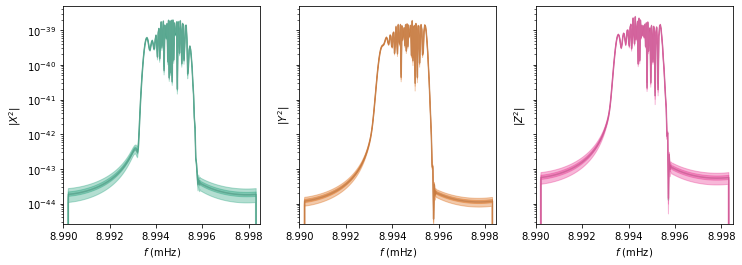

In [3]:
# 
# Simulated data and reconstructed waveforms in XYZ TDI channels
#

data_X = np.loadtxt(ROOT_DIR+'ucb/data/power_data.dat',usecols=(0,1))
data_Y = np.loadtxt(ROOT_DIR+'ucb/data/power_data.dat',usecols=(0,2))
data_Z = np.loadtxt(ROOT_DIR+'ucb/data/power_data.dat',usecols=(0,3))

waveform_X = np.loadtxt(ROOT_DIR+'ucb/data/power_reconstruction.dat',usecols=(0,1,2,3,4,5))
waveform_Y = np.loadtxt(ROOT_DIR+'ucb/data/power_reconstruction.dat',usecols=(0,6,7,8,9,10))
waveform_Z = np.loadtxt(ROOT_DIR+'ucb/data/power_reconstruction.dat',usecols=(0,11,12,13,14,15))

fig,axs = plt.subplots(1,3,sharey=True, sharex=True, figsize=(12,4))

axs[0].plot(1000*data_X[:,0],data_X[:,1],color='gray',alpha=1/3)
axs[0].fill_between(1000*waveform_X[:,0],waveform_X[:,4],waveform_X[:,5],color=colors[0],alpha=1/3)
axs[0].fill_between(1000*waveform_X[:,0],waveform_X[:,2],waveform_X[:,3],color=colors[0],alpha=1/3)
axs[0].plot(1000*waveform_X[:,0],waveform_X[:,1],color=colors[0],alpha=1/3)

axs[1].plot(1000*data_Y[:,0],data_Y[:,1],color='gray',alpha=1/3)
axs[1].fill_between(1000*waveform_Y[:,0],waveform_Y[:,4],waveform_Y[:,5],color=colors[1],alpha=1/3)
axs[1].fill_between(1000*waveform_Y[:,0],waveform_Y[:,2],waveform_Y[:,3],color=colors[1],alpha=1/3)
axs[1].plot(1000*waveform_Y[:,0],waveform_Y[:,1],color=colors[1],alpha=1/3)

axs[2].plot(1000*data_Z[:,0],data_Z[:,1],color='gray',alpha=1/3)
axs[2].fill_between(1000*waveform_Z[:,0],waveform_Z[:,4],waveform_Z[:,5],color=colors[2],alpha=1/3)
axs[2].fill_between(1000*waveform_Z[:,0],waveform_Z[:,2],waveform_Z[:,3],color=colors[2],alpha=1/3)
axs[2].plot(1000*waveform_Z[:,0],waveform_Z[:,1],color=colors[2],alpha=1/3)

axs[0].set_ylabel(r'$|X^2|$')
axs[1].set_ylabel(r'$|Y^2|$')
axs[2].set_ylabel(r'$|Z^2|$')
axs[0].set_xlabel(r'$f$ (mHz)')
axs[1].set_xlabel(r'$f$ (mHz)')
axs[2].set_xlabel(r'$f$ (mHz)')

axs[0].set_xlim(8.99,8.9985)

plt.yscale('log')

plt.show()

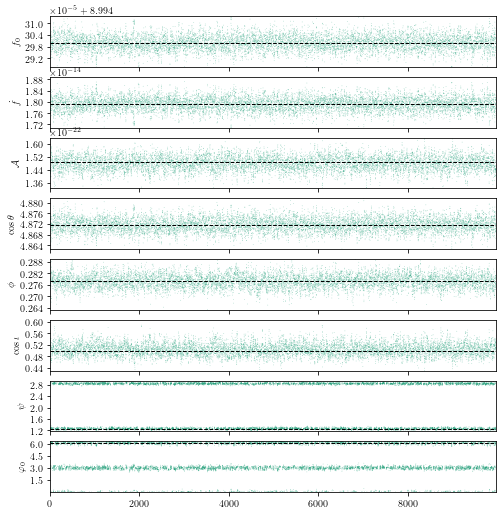

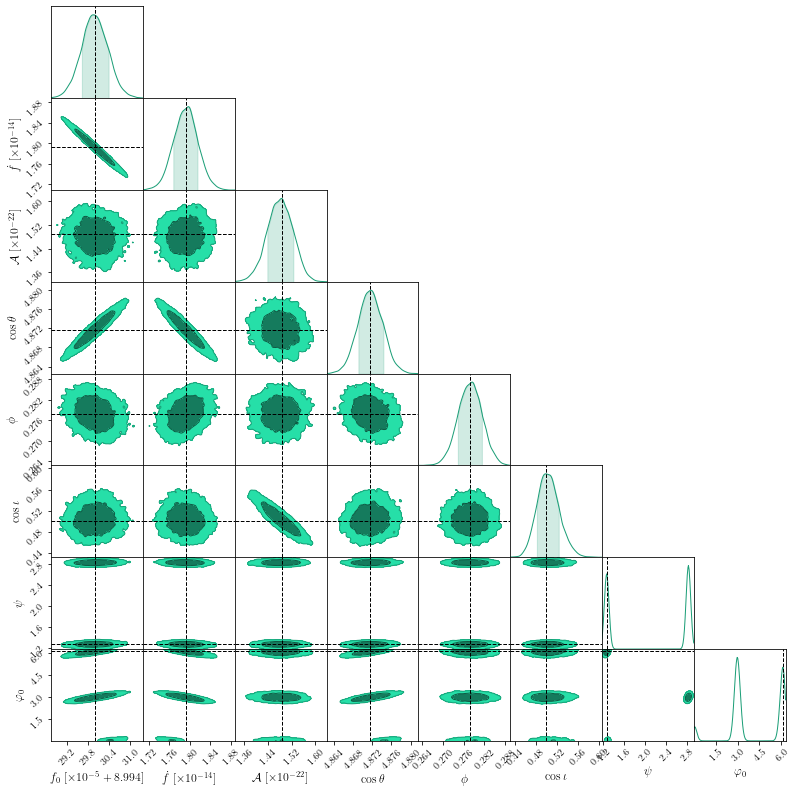

In [4]:
# 
# Chains and posterior distributions for UCB parameters
#

chain = np.loadtxt(ROOT_DIR+'ucb/chains/dimension_chain.dat.1',usecols=(0,1,2,3,4,5,6,7))
truth = np.loadtxt(ROOT_DIR+'ucb/injection_parameters_0.dat',usecols=(1,2,3,4,5,6,7,8))
chain[:,0]=chain[:,0]*1000
truth[0]=truth[0]*1000

ucb_parameters = [r'$f_0$',r'$\dot f$',r'$\mathcal{A}$',r'$\cos\theta$',r'$\phi$',r'$\cos\iota$',r'$\psi$',r'$\varphi_0$']
c = ChainConsumer()
c.add_chain(chain,parameters=ucb_parameters,color=colors[0])


plot=c.plotter.plot_walks(truth=truth)
plot=c.plotter.plot(truth=truth)


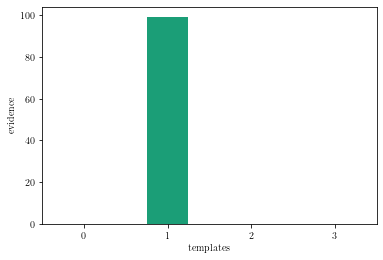

In [5]:
# 
# Model dimension posterior
#

evidence=np.loadtxt(ROOT_DIR+'ucb/evidence.dat')
plt.bar(evidence[:,0],evidence[:,1],width=0.5,color=colors[0])
plt.xlim(-0.5,3.5)
plt.xticks(np.arange(0, 4, step=1))
plt.xlabel('templates')
plt.ylabel('evidence')
plt.show()

### Verification binary injection

Parameter estimation of simulated AM CVn signal in noiseless data using `ucb_mcmc`. 
Injection parameters are stored in `ldasoft/ucb/etc/sources/verification/amcvn.dat`.
The `ucb_mcmc` sampler is initialized at the injection parameter values and samples over the unknown parameters. Flags are set so that the orbital period and sky location are held fixed to the injected values.


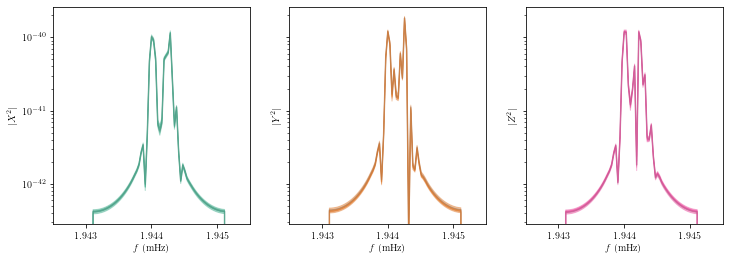

In [6]:
# 
# Simulated data and reconstructed waveforms in XYZ TDI channels
#

data_X = np.loadtxt(ROOT_DIR+'amcvn/data/power_data.dat',usecols=(0,1))
data_Y = np.loadtxt(ROOT_DIR+'amcvn/data/power_data.dat',usecols=(0,2))
data_Z = np.loadtxt(ROOT_DIR+'amcvn/data/power_data.dat',usecols=(0,3))

waveform_X = np.loadtxt(ROOT_DIR+'amcvn/data/power_reconstruction.dat',usecols=(0,1,2,3,4,5))
waveform_Y = np.loadtxt(ROOT_DIR+'amcvn/data/power_reconstruction.dat',usecols=(0,6,7,8,9,10))
waveform_Z = np.loadtxt(ROOT_DIR+'amcvn/data/power_reconstruction.dat',usecols=(0,11,12,13,14,15))

fig,axs = plt.subplots(1,3,sharey=True, sharex=True, figsize=(12,4))

axs[0].plot(1000*data_X[:,0],data_X[:,1],color='gray',alpha=1/3)
axs[0].fill_between(1000*waveform_X[:,0],waveform_X[:,4],waveform_X[:,5],color=colors[0],alpha=1/3)
axs[0].fill_between(1000*waveform_X[:,0],waveform_X[:,2],waveform_X[:,3],color=colors[0],alpha=1/3)
axs[0].plot(1000*waveform_X[:,0],waveform_X[:,1],color=colors[0],alpha=1/3)

axs[1].plot(1000*data_Y[:,0],data_Y[:,1],color='gray',alpha=1/3)
axs[1].fill_between(1000*waveform_Y[:,0],waveform_Y[:,4],waveform_Y[:,5],color=colors[1],alpha=1/3)
axs[1].fill_between(1000*waveform_Y[:,0],waveform_Y[:,2],waveform_Y[:,3],color=colors[1],alpha=1/3)
axs[1].plot(1000*waveform_Y[:,0],waveform_Y[:,1],color=colors[1],alpha=1/3)

axs[2].plot(1000*data_Z[:,0],data_Z[:,1],color='gray',alpha=1/3)
axs[2].fill_between(1000*waveform_Z[:,0],waveform_Z[:,4],waveform_Z[:,5],color=colors[2],alpha=1/3)
axs[2].fill_between(1000*waveform_Z[:,0],waveform_Z[:,2],waveform_Z[:,3],color=colors[2],alpha=1/3)
axs[2].plot(1000*waveform_Z[:,0],waveform_Z[:,1],color=colors[2],alpha=1/3)

axs[0].set_ylabel(r'$|X^2|$')
axs[1].set_ylabel(r'$|Y^2|$')
axs[2].set_ylabel(r'$|Z^2|$')
axs[0].set_xlabel(r'$f$ (mHz)')
axs[1].set_xlabel(r'$f$ (mHz)')
axs[2].set_xlabel(r'$f$ (mHz)')

plt.yscale('log')
axs[0].set_xlim(1.9425,1.9455)

plt.show()

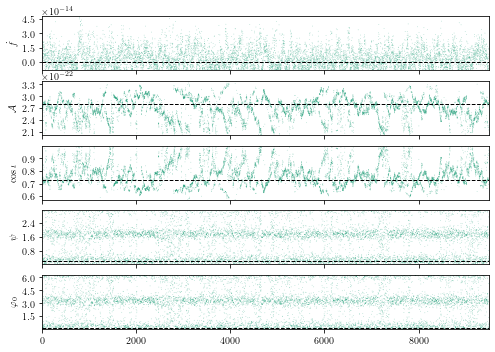

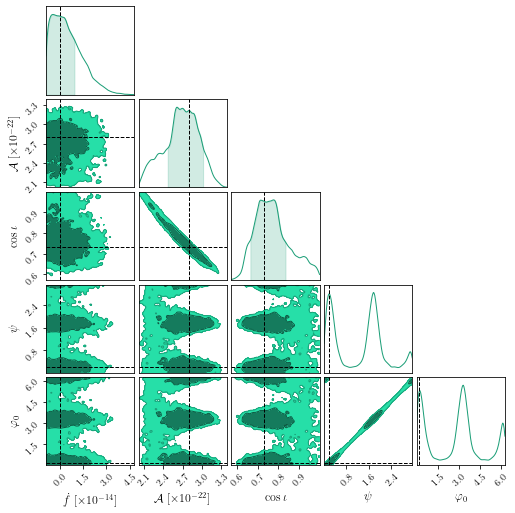

In [7]:
# 
# Chains and posterior distributions for unknown UCB parameters
#

chain = np.loadtxt(ROOT_DIR+'amcvn/chains/dimension_chain.dat.1',usecols=(1,2,5,6,7))
truth = np.loadtxt(ROOT_DIR+'amcvn/injection_parameters_0.dat',usecols=(2,3,6,7,8))
chain[:,0]=chain[:,0]*1000

parameters = [r'$\dot f$',r'$\mathcal{A}$',r'$\cos\iota$',r'$\psi$',r'$\varphi_0$']

c = ChainConsumer()
c.add_chain(chain,parameters=parameters,color=colors[0])


plot=c.plotter.plot_walks(truth=truth)
plot=c.plotter.plot(truth=truth)



### Verification binary (targeted search) sampler

Parameter estimation of multiple verification binary injections in noiseless data using the targeted `vgb_mcmc` sampler. 
Injection parameters are stored in `ldasoft/apps/etc/verification_binaries.txt` and correspond to AM CVn and HM Cnc. 

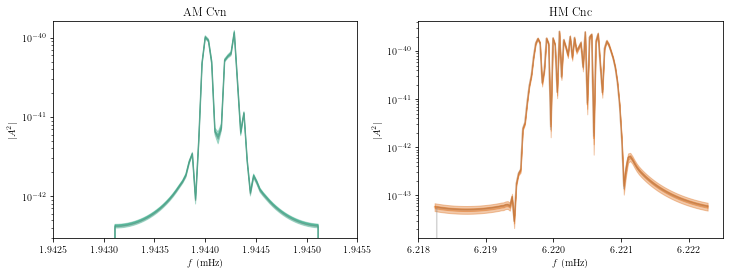

In [8]:
# 
# Injected and reconstructed waveforms in X TDI channel
#

data_amcvn = np.loadtxt(ROOT_DIR+'vgb_mcmc/seg00/data/power_data.dat',usecols=(0,1))
data_hmcnc = np.loadtxt(ROOT_DIR+'vgb_mcmc/seg01/data/power_data.dat',usecols=(0,1))

amcvn = np.loadtxt(ROOT_DIR+'vgb_mcmc/seg00/data/power_reconstruction.dat',usecols=(0,1,2,3,4,5))
hmcnc = np.loadtxt(ROOT_DIR+'vgb_mcmc/seg01/data/power_reconstruction.dat',usecols=(0,1,2,3,4,5))

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(1000*data_amcvn[:,0],data_amcvn[:,1],color='gray',alpha=1/3)
ax[0].fill_between(1000*amcvn[:,0],amcvn[:,4],amcvn[:,5],color=colors[0],alpha=1/3)
ax[0].fill_between(1000*amcvn[:,0],amcvn[:,2],amcvn[:,3],color=colors[0],alpha=1/3)
ax[0].plot(1000*amcvn[:,0],amcvn[:,1],color=colors[0],alpha=1/3,label='amcvn')

ax[1].plot(1000*data_hmcnc[:,0],data_hmcnc[:,1],color='gray',alpha=1/3)
ax[1].fill_between(1000*hmcnc[:,0],hmcnc[:,4],hmcnc[:,5],color=colors[1],alpha=1/3)
ax[1].fill_between(1000*hmcnc[:,0],hmcnc[:,2],hmcnc[:,3],color=colors[1],alpha=1/3)
ax[1].plot(1000*hmcnc[:,0],hmcnc[:,1],color=colors[1],alpha=1/3,label='hmcnc')

ax[0].set_ylabel(r'$|A^2|$')
ax[0].set_xlabel(r'$f$ (mHz)')
ax[1].set_ylabel(r'$|A^2|$')
ax[1].set_xlabel(r'$f$ (mHz)')

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_title('AM Cvn')
ax[1].set_title('HM Cnc')

ax[0].set_xlim(1.9425,1.9455)
ax[1].set_xlim(6.218,6.2225)


plt.show()

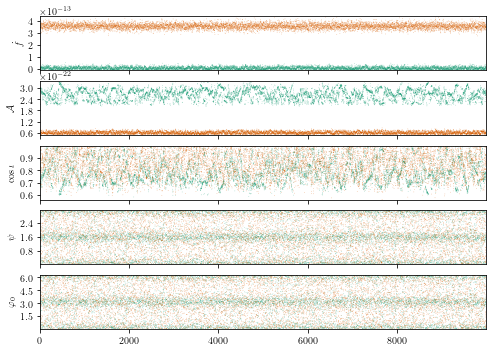

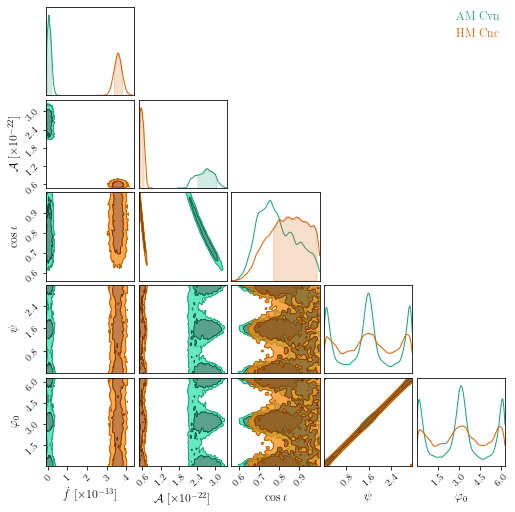

In [9]:
# 
# Chains and posterior distributions for VGB parameters
#

amcvn = np.loadtxt(ROOT_DIR+'vgb_mcmc/seg00/chains/dimension_chain.dat.1',usecols=(1,2,5,6,7))
amcvn[:,0]=amcvn[:,0]*1000

hmcnc = np.loadtxt(ROOT_DIR+'vgb_mcmc/seg01/chains/dimension_chain.dat.1',usecols=(1,2,5,6,7))
hmcnc[:,0]=hmcnc[:,0]*1000


parameters = [r'$\dot f$',r'$\mathcal{A}$',r'$\cos\iota$',r'$\psi$',r'$\varphi_0$']

c = ChainConsumer()
c.add_chain(amcvn,parameters=parameters,color=colors[0],name='AM Cvn')
c.add_chain(hmcnc,parameters=parameters,color=colors[1],name='HM Cnc')

plot = c.plotter.plot_walks()
plot = c.plotter.plot()



## Noise Model Samplers
Figures of merit for `noise_spline_mcmc` and `noise_mcmc` test cases.

### Spline model

Fit simulated XYZ TDI data using akima spline model for the PSDs using `noise_spline_mcmc`.
The data are simulated including an isotropic approximation to the galactic confusion noise.
The spline model assumes independent TDI channels (which is not true in the XYZ channels).


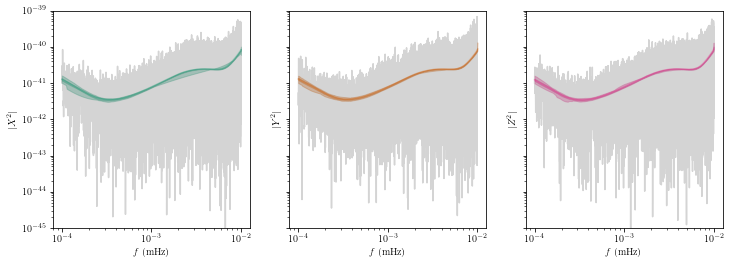

In [10]:
#
# Simulated data and reconstructed PSD models
#

data_X = np.loadtxt(ROOT_DIR+'noise_spline_mcmc/data/power_data.dat',usecols=(0,1))
data_Y = np.loadtxt(ROOT_DIR+'noise_spline_mcmc/data/power_data.dat',usecols=(0,2))
data_Z = np.loadtxt(ROOT_DIR+'noise_spline_mcmc/data/power_data.dat',usecols=(0,3))

noise_X = np.loadtxt(ROOT_DIR+'noise_spline_mcmc/data/power_noise_reconstruction.dat',usecols=(0,1,2,3,4,5))
noise_Y = np.loadtxt(ROOT_DIR+'noise_spline_mcmc/data/power_noise_reconstruction.dat',usecols=(0,6,7,8,9,10))
noise_Z = np.loadtxt(ROOT_DIR+'noise_spline_mcmc/data/power_noise_reconstruction.dat',usecols=(0,11,12,13,14,15))

# spline_X = np.loadtxt(ROOT_DIR+'noise_spline_mcmc/data/final_spline_points.dat',usecols=(0,1))
# spline_Y = np.loadtxt(ROOT_DIR+'noise_spline_mcmc/data/final_spline_points.dat',usecols=(0,2))
# spline_Z = np.loadtxt(ROOT_DIR+'noise_spline_mcmc/data/final_spline_points.dat',usecols=(0,3))

fig,axs = plt.subplots(1,3,sharey=True,sharex=True,figsize=(12,4))

axs[0].plot(data_X[:,0],data_X[:,1]*2,color='gray',alpha=1/3)
axs[0].fill_between(noise_X[:,0],noise_X[:,4],noise_X[:,5],color=colors[0],alpha=1/3)
axs[0].fill_between(noise_X[:,0],noise_X[:,2],noise_X[:,3],color=colors[0],alpha=1/3)
axs[0].plot(noise_X[:,0],noise_X[:,1],color=colors[0],alpha=1/3)
# axs[0].plot(spline_X[:,0],spline_X[:,1],color=colors[3],linestyle='',marker='o')


axs[1].plot(data_Y[:,0],data_Y[:,1]*2,color='gray',alpha=1/3)
axs[1].fill_between(noise_Y[:,0],noise_Y[:,4],noise_Y[:,5],color=colors[1],alpha=1/3)
axs[1].fill_between(noise_Y[:,0],noise_Y[:,2],noise_Y[:,3],color=colors[1],alpha=1/3)
axs[1].plot(noise_Y[:,0],noise_Y[:,1],color=colors[1],alpha=1/3)
# axs[1].plot(spline_Y[:,0],spline_Y[:,1],color=colors[3],linestyle='',marker='o')

axs[2].plot(data_Z[:,0],data_Z[:,1]*2,color='gray',alpha=1/3)
axs[2].fill_between(noise_Z[:,0],noise_Z[:,4],noise_Z[:,5],color=colors[2],alpha=1/3)
axs[2].fill_between(noise_Z[:,0],noise_Z[:,2],noise_Z[:,3],color=colors[2],alpha=1/3)
axs[2].plot(noise_Z[:,0],noise_Z[:,1],color=colors[2],alpha=1/3)
# axs[2].plot(spline_Z[:,0],spline_Z[:,1],color=colors[3],linestyle='',marker='o')

plt.ylim(1e-45,1e-39)
plt.yscale('log')
plt.xscale('log')

axs[0].set_ylabel(r'$|X^2|$')
axs[1].set_ylabel(r'$|Y^2|$')
axs[2].set_ylabel(r'$|Z^2|$')
axs[0].set_xlabel(r'$f$ (mHz)')
axs[1].set_xlabel(r'$f$ (mHz)')
axs[2].set_xlabel(r'$f$ (mHz)')


plt.show()


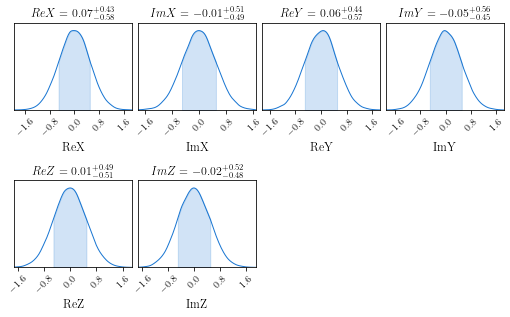

In [11]:
#
# Histograms of whitened real and imaginary components of the TDI channels
#

whitened_data = np.loadtxt(ROOT_DIR+'noise_spline_mcmc/data/whitened_data.dat',usecols=(1,2,3,4,5,6))
data_params = ['ReX','ImX','ReY','ImY','ReZ','ImZ']

c = ChainConsumer()

c.add_chain(whitened_data,parameters=data_params)
plot=c.plotter.plot_distributions()

### Parameterized model

Fit simulated XYZ TDI data using parameterized model for the noise covariance matrix using `noise_mcmc`.
The data are simulated including an isotropic approximation to the galactic confusion noise and the fit is to the full covariance matrix, including nonzero cross spectral densities.

The noise model fits to the OMS and acceleration noise levels in each interferometer link, but assumes the spectral shape of the noise matches the LISA Science Requirements document.

The galactic foreground model uses a phenomenological fit to the confusion noise and assumes the noise is isotropic.

$S_{\rm gal} = A f^{5/3} e^{-\frac{f}{f_1}^{\alpha}} \frac{1}{2}\left(1+\tanh{\frac{f_k-f}{f_2}} \right)$


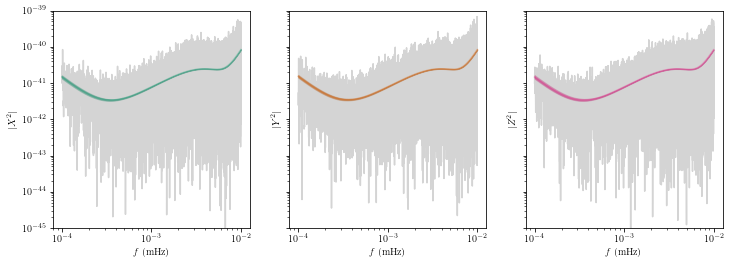

In [12]:
#
# Simulated data and reconstructed PSD models
#

data_X = np.loadtxt(ROOT_DIR+'noise_mcmc/data/power_data.dat',usecols=(0,1))
data_Y = np.loadtxt(ROOT_DIR+'noise_mcmc/data/power_data.dat',usecols=(0,2))
data_Z = np.loadtxt(ROOT_DIR+'noise_mcmc/data/power_data.dat',usecols=(0,3))

noise_X = np.loadtxt(ROOT_DIR+'noise_mcmc/data/power_noise_reconstruction.dat',usecols=(0,1,2,3,4,5))
noise_Y = np.loadtxt(ROOT_DIR+'noise_mcmc/data/power_noise_reconstruction.dat',usecols=(0,6,7,8,9,10))
noise_Z = np.loadtxt(ROOT_DIR+'noise_mcmc/data/power_noise_reconstruction.dat',usecols=(0,11,12,13,14,15))

fig,axs = plt.subplots(1,3,sharey=True,sharex=True,figsize=(12,4))

axs[0].plot(data_X[:,0],data_X[:,1]*2,color='gray',alpha=1/3)
axs[0].fill_between(noise_X[:,0],noise_X[:,4],noise_X[:,5],color=colors[0],alpha=1/3)
axs[0].fill_between(noise_X[:,0],noise_X[:,2],noise_X[:,3],color=colors[0],alpha=1/3)
axs[0].plot(noise_X[:,0],noise_X[:,1],color=colors[0],alpha=1/3)

axs[1].plot(data_Y[:,0],data_Y[:,1]*2,color='gray',alpha=1/3)
axs[1].fill_between(noise_Y[:,0],noise_Y[:,4],noise_Y[:,5],color=colors[1],alpha=1/3)
axs[1].fill_between(noise_Y[:,0],noise_Y[:,2],noise_Y[:,3],color=colors[1],alpha=1/3)
axs[1].plot(noise_Y[:,0],noise_Y[:,1],color=colors[1],alpha=1/3)

axs[2].plot(data_Z[:,0],data_Z[:,1]*2,color='gray',alpha=1/3)
axs[2].fill_between(noise_Z[:,0],noise_Z[:,4],noise_Z[:,5],color=colors[2],alpha=1/3)
axs[2].fill_between(noise_Z[:,0],noise_Z[:,2],noise_Z[:,3],color=colors[2],alpha=1/3)
axs[2].plot(noise_Z[:,0],noise_Z[:,1],color=colors[2],alpha=1/3)

plt.ylim(1e-45,1e-39)
plt.yscale('log')
plt.xscale('log')


axs[0].set_ylabel(r'$|X^2|$')
axs[1].set_ylabel(r'$|Y^2|$')
axs[2].set_ylabel(r'$|Z^2|$')
axs[0].set_xlabel(r'$f$ (mHz)')
axs[1].set_xlabel(r'$f$ (mHz)')
axs[2].set_xlabel(r'$f$ (mHz)')

plt.show()


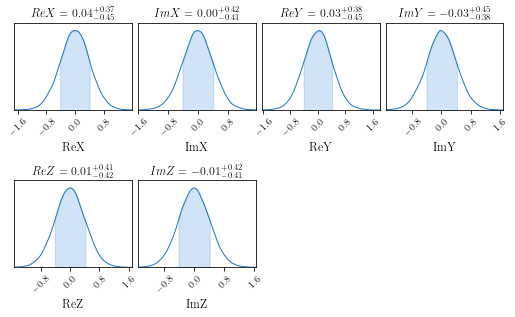

In [13]:
#
# Histograms of whitened real and imaginary components of the TDI channels
#

whitened_data = np.loadtxt(ROOT_DIR+'noise_mcmc/data/whitened_data.dat',usecols=(1,2,3,4,5,6))
data_params = ['ReX','ImX','ReY','ImY','ReZ','ImZ']

c = ChainConsumer()

c.add_chain(whitened_data,parameters=data_params)
plot=c.plotter.plot_distributions()

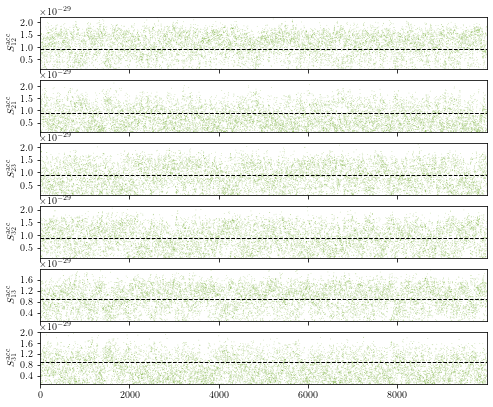

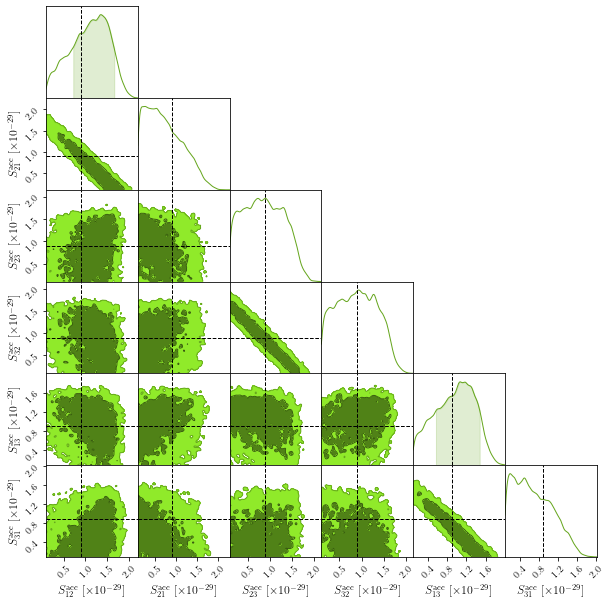

In [14]:
#
# Chains and posterior distributions for the acceleration noise levels
#

acc = np.loadtxt(ROOT_DIR+"noise_mcmc/chains/noise_chain.dat", usecols=(2,3,4,5,6,7))
acc_parameters = [r'$S^{\rm acc}_{12}$',
                  r'$S^{\rm acc}_{21}$',
                  r'$S^{\rm acc}_{23}$',
                  r'$S^{\rm acc}_{32}$',
                  r'$S^{\rm acc}_{13}$',
                  r'$S^{\rm acc}_{31}$'] 
acc_truth=[9e-30,9e-30,9e-30,9e-30,9e-30,9e-30]
c=ChainConsumer()
c.add_chain(acc, parameters=acc_parameters,color=colors[3])


plot=c.plotter.plot_walks(truth=acc_truth)
plot=c.plotter.plot(truth=acc_truth)

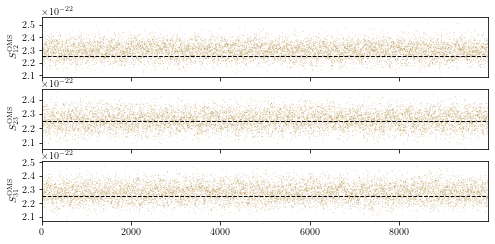

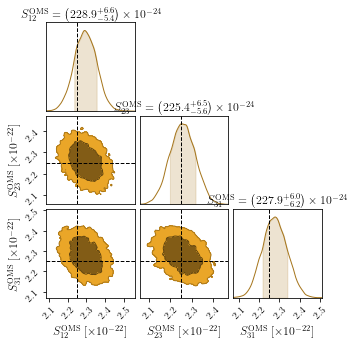

In [15]:
#
# Chains and posterior distributions for the OMS (Optical Metrology System) noise levels
#

oms = np.loadtxt(ROOT_DIR+"noise_mcmc/chains/noise_chain.dat", usecols=(8,10,12))
oms_parameters = [r'$S^{\rm OMS}_{12}$',
                  r'$S^{\rm OMS}_{23}$',
                  r'$S^{\rm OMS}_{31}$'] 
oms_truth=[2.25e-22,2.25e-22,2.25e-22]
c=ChainConsumer()
c.add_chain(oms,parameters=oms_parameters,color=colors[4])

plot=c.plotter.plot_walks(truth=oms_truth)
plot=c.plotter.plot(truth=oms_truth)

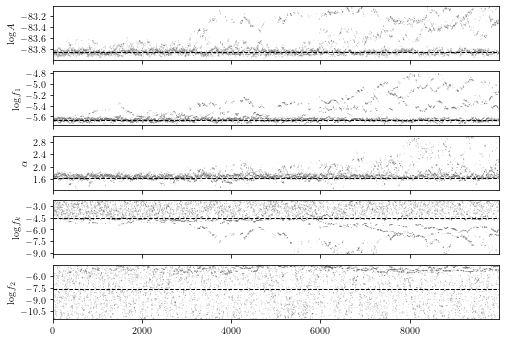

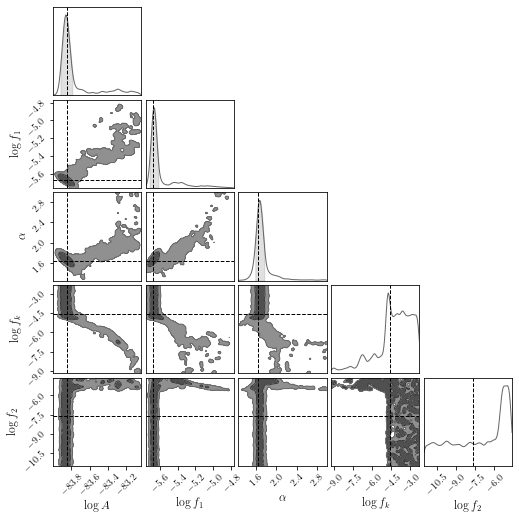

In [16]:
#
# Chains and posterior distribution functions for the foreground noise parameters
#

# injection values for 1 month observation time 
A      = 3.86673e-37 # Overall foreground power level at 0 Hz
f_1    = 0.00344439  # frequency for exponential decay to kick in
alpha  = 1.62967     # spectral index for exponential decay term
f_knee = 0.0102644   # frequency for hyperbolic tangent decay to kick in
f_2    = 0.000481078 # characteristic width of hyperbolic tangent decay

gal = np.loadtxt(ROOT_DIR+"noise_mcmc/chains/foreground_chain.dat", usecols=(2,3,4,5,6))
gal_truth=[np.log(A),np.log(f_1),alpha,np.log(f_knee),np.log(f_2)]
gal_parameters=[r"$\log A$",r"$\log f_1$",r"$\alpha$",r"$\log f_k$",r"$\log f_2$"]

c=ChainConsumer()
c.add_chain(gal,parameters=gal_parameters,color=colors[5])

plot=c.plotter.plot_walks(truth=gal_truth)
plot=c.plotter.plot(truth=gal_truth)

## Global Fit sampler
Figures of merit for `global_fit` test case

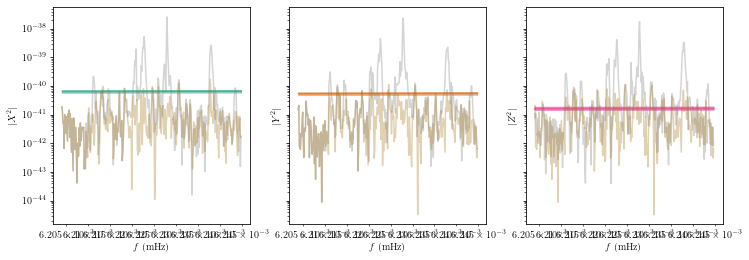

In [17]:
#
# Simulated data and residual
#

data_X = np.loadtxt(ROOT_DIR+'globalfit/data/power_data.dat',usecols=(0,1))
data_Y = np.loadtxt(ROOT_DIR+'globalfit/data/power_data.dat',usecols=(0,2))
data_Z = np.loadtxt(ROOT_DIR+'globalfit/data/power_data.dat',usecols=(0,3))

residual_X = np.loadtxt(ROOT_DIR+'globalfit/noise/data/power_data.dat',usecols=(0,1))
residual_Y = np.loadtxt(ROOT_DIR+'globalfit/noise/data/power_data.dat',usecols=(0,2))
residual_Z = np.loadtxt(ROOT_DIR+'globalfit/noise/data/power_data.dat',usecols=(0,3))

noise_X = np.loadtxt(ROOT_DIR+'globalfit/noise/data/power_noise_reconstruction.dat',usecols=(0,1,2,3,4,5))
noise_Y = np.loadtxt(ROOT_DIR+'globalfit/noise/data/power_noise_reconstruction.dat',usecols=(0,6,7,8,9,10))
noise_Z = np.loadtxt(ROOT_DIR+'globalfit/noise/data/power_noise_reconstruction.dat',usecols=(0,11,12,13,14,15))

fig,axs = plt.subplots(1,3,sharey=True,sharex=True,figsize=(12,4))

axs[0].plot(data_X[:,0],data_X[:,1]*2,color='gray',alpha=1/3)
axs[0].plot(residual_X[:,0],residual_X[:,1]*2,color=colors[4],alpha=1/3)
axs[0].fill_between(noise_X[:,0],noise_X[:,4],noise_X[:,5],color=colors[0],alpha=1/3)
axs[0].fill_between(noise_X[:,0],noise_X[:,2],noise_X[:,3],color=colors[0],alpha=1/3)
axs[0].plot(noise_X[:,0],noise_X[:,1],color=colors[0],alpha=1/3)

axs[1].plot(data_Y[:,0],data_Y[:,1]*2,color='gray',alpha=1/3)
axs[1].plot(residual_Y[:,0],residual_Y[:,1]*2,color=colors[4],alpha=1/3)
axs[1].fill_between(noise_Y[:,0],noise_Y[:,4],noise_Y[:,5],color=colors[1],alpha=1/3)
axs[1].fill_between(noise_Y[:,0],noise_Y[:,2],noise_Y[:,3],color=colors[1],alpha=1/3)
axs[1].plot(noise_Y[:,0],noise_Y[:,1],color=colors[1],alpha=1/3)

axs[2].plot(data_Z[:,0],data_Z[:,1]*2,color='gray',alpha=1/3)
axs[2].plot(residual_Y[:,0],residual_Y[:,1]*2,color=colors[4],alpha=1/3)
axs[2].fill_between(noise_Z[:,0],noise_Z[:,4],noise_Z[:,5],color=colors[2],alpha=1/3)
axs[2].fill_between(noise_Z[:,0],noise_Z[:,2],noise_Z[:,3],color=colors[2],alpha=1/3)
axs[2].plot(noise_Z[:,0],noise_Z[:,1],color=colors[2],alpha=1/3)

#plt.ylim(1e-45,1e-39)
plt.yscale('log')
plt.xscale('log')


axs[0].set_ylabel(r'$|X^2|$')
axs[1].set_ylabel(r'$|Y^2|$')
axs[2].set_ylabel(r'$|Z^2|$')
axs[0].set_xlabel(r'$f$ (mHz)')
axs[1].set_xlabel(r'$f$ (mHz)')
axs[2].set_xlabel(r'$f$ (mHz)')

plt.show()